Goals: Search for best (launch point, launch angle) pair

In [44]:
side = 10
particle_radius = 2
scatter_radius_crit = (side - particle_radius)/2**(1/2) - particle_radius
scatter_radius_max = side - 2*particle_radius
scatter_radius = scatter_radius_crit * .01
# scatter_radius = scatter_radius_max * 0.99

num_walls = 5
hole = 3
max_steps = 1000
seed = 19

%run -i Sinai_billiard_defs.py

X = np.linspace(-hole_range, hole_range, 51)
Y = [-y_range]
S = [1.0]
T = np.linspace(0.1, np.pi-.1, 51)
T = [np.pi/4+.001, 3*np.pi/4-.001]

import itertools as it
exp_list = list(it.product(X,Y,S,T))
num_collisions = [run_trial(*exp)[0] for exp in exp_list]

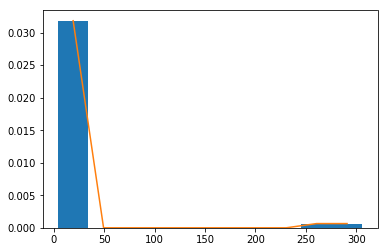

In [46]:
X = plt.hist(num_collisions, normed=True, align='mid')
plt.plot((X[1][1:] + X[1][:-1]) / 2, X[0])
plt.show()

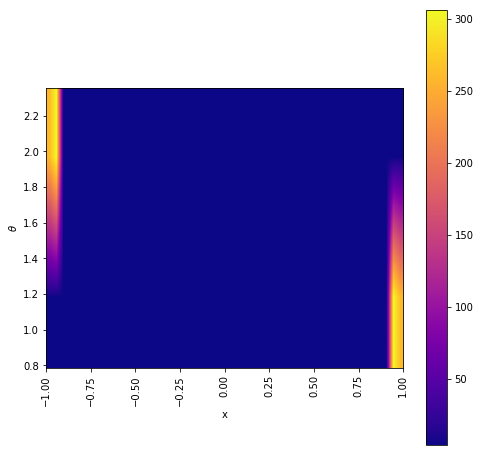

,x,y,speed,theta,num_collisions
0,-1.00,-8,1.0,0.786398,261
1,-1.00,-8,1.0,2.355194,4
2,-0.96,-8,1.0,0.786398,306
3,-0.96,-8,1.0,2.355194,4
4,-0.92,-8,1.0,0.786398,4
5,-0.92,-8,1.0,2.355194,4
6,-0.88,-8,1.0,0.786398,4
7,-0.88,-8,1.0,2.355194,4
8,-0.84,-8,1.0,0.786398,4
9,-0.84,-8,1.0,2.355194,4


In [47]:
import pandas as pd

rec = pd.DataFrame(exp_list, columns=['x','y','speed','theta'])
rec['num_collisions'] = num_collisions

p = rec.pivot('theta','x','num_collisions')
fig, ax = plt.subplots(figsize=[8,8])

plt.imshow(p, interpolation='bilinear', cmap="plasma",
           extent=[min(p.columns), max(p.columns), min(p.index), max(p.index)])
plt.xticks(rotation='vertical')
plt.xlabel('x')
plt.ylabel(r'$\theta$')
plt.colorbar()
plt.show()

display(rec)


In [24]:
X[1].shape

(11,)